# Лабораторная работа 1. Введение в PyTorch

### Содержание
1. [Установка](#Установка)
1. [Тензоры](#Тензоры)
1. [Автоматическое дифференцирование](#Автоматическое-дифференцирование)
1. [Линейная регрессия в PyTorch](#Линейная-регрессия-в-PyTorch)
1. [Линейная классификация в PyTorch](#Линейная-классификация-в-PyTorch)

### Установка
Чтобы установить PyTorch, нужно на [официальном сайте](https://pytorch.org/get-started/locally/) сгенерировать команду для установки в зависимости от версии операционной системы и других параметров.  
Рекомендуется также установить [CUDA](https://developer.nvidia.com/cuda-zone) (Compute Unified Device Architecture) – вычислительную платформу от Nvidia для поддержки вычислений на видеокартах и [CuDNN](https://developer.nvidia.com/cudnn) (CUDA Deep Neural Network) – библиотеку на основе CUDA для поддержки глубоких нейронных сетей.  
Проверить правильность установки и узнать версии используемого ПО можно следующим образом:

In [1]:
import torch
import sys

In [2]:
# Утилита от Nvidia для вывода информации о видеокарте
!nvidia-smi

Wed Aug 14 13:07:04 2024       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 556.12                 Driver Version: 556.12         CUDA Version: 12.5     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                  Driver-Model | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce GTX 1650      WDDM  |   00000000:01:00.0 Off |                  N/A |
| N/A   45C    P8              3W /   50W |       0MiB /   4096MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [3]:
print('Python VERSION:', sys.version)
print('\npyTorch VERSION:', torch.__version__)
print('\nCUDA VERSION:')
# ! nvcc --version
print('\nCUDNN VERSION:', torch.backends.cudnn.version())
print('\nNumber CUDA Devices:', torch.cuda.device_count())
print('Current cuda device:', torch.cuda.current_device())
print('Cuda device name: ', torch.cuda.get_device_name(0))

Python VERSION: 3.11.5 | packaged by Anaconda, Inc. | (main, Sep 11 2023, 13:26:23) [MSC v.1916 64 bit (AMD64)]

pyTorch VERSION: 2.3.0+cu118

CUDA VERSION:

CUDNN VERSION: 8700

Number CUDA Devices: 1
Current cuda device: 0
Cuda device name:  NVIDIA GeForce GTX 1650


---
Проверить доступность CUDA можно также следующим образом:

In [4]:
torch.cuda.is_available()

True

### Тензоры
*Тензор* – многомерный массив данных в библиотеках глубокого обучения. Тензор может быть 0-мерным (скаляр), одномерным (вектор), двумерным (матрица) или размерностью больше двух.  
Тензоры используются для представления входов, выходов и параметров моделей.

#### Инициализация тензоров
Тензоры могут быть инициализированы несколькими способами.

1. На основе данных:

In [5]:
data = [[1, 2],[3, 4]]
x_data = torch.tensor(data)
x_data

tensor([[1, 2],
        [3, 4]])

2. Из массивов NumPy:

In [6]:
import numpy as np
np_array = np.array(data)
x_np = torch.from_numpy(np_array)
x_np

tensor([[1, 2],
        [3, 4]], dtype=torch.int32)

3. Заполненные случайным образом или константными значениями:

In [7]:
shape = (2,3)
rand_tensor = torch.rand(shape)
ones_tensor = torch.ones(shape)
zeros_tensor = torch.zeros(shape)

print(f'Random Tensor: \n {rand_tensor} \n')
print(f'Ones Tensor: \n {ones_tensor} \n')
print(f'Zeros Tensor: \n {zeros_tensor}')

Random Tensor: 
 tensor([[0.4356, 0.7513, 0.8867],
        [0.4411, 0.7331, 0.9775]]) 

Ones Tensor: 
 tensor([[1., 1., 1.],
        [1., 1., 1.]]) 

Zeros Tensor: 
 tensor([[0., 0., 0.],
        [0., 0., 0.]])


#### Атрибуты тензоров
Тензоры имеют несколько атрибутов, в том числе:

In [8]:
tensor = torch.rand(3, 4)
print(f'Shape of tensor: {tensor.shape}')
print(f'Datatype of tensor: {tensor.dtype}')
print(f'Device tensor is stored on the following device: {tensor.device}')
tensor

Shape of tensor: torch.Size([3, 4])
Datatype of tensor: torch.float32
Device tensor is stored on the following device: cpu


tensor([[0.7324, 0.7801, 0.9585, 0.5028],
        [0.1316, 0.2224, 0.8002, 0.9622],
        [0.9730, 0.7546, 0.3012, 0.4019]])

#### Операции над тензорами
По умолчанию тензоры создаются на CPU.  
Чтобы переместить их на GPU нужно вызвать метод `to`:

In [9]:
print(f'Tensor is stored on: {tensor.device}')
if torch.cuda.is_available():
    tensor = tensor.to('cuda')
print(f'Tensor is stored on: {tensor.device}')

Tensor is stored on: cpu
Tensor is stored on: cuda:0


---
Индексирование и срезы (slicing):

In [10]:
tensor = torch.tensor([[1, 2, 3, 4], [5, 6, 7, 8], [9, 10, 11, 12]])
print(f'Initial tensor:\n{tensor}\n')
print(f'First row: {tensor[0]}\n')
print(f'First column: {tensor[:, 0]}\n')
print(f'Last column: {tensor[..., -1]}\n')
tensor[:,1] = 0
print(tensor)

Initial tensor:
tensor([[ 1,  2,  3,  4],
        [ 5,  6,  7,  8],
        [ 9, 10, 11, 12]])

First row: tensor([1, 2, 3, 4])

First column: tensor([1, 5, 9])

Last column: tensor([ 4,  8, 12])

tensor([[ 1,  0,  3,  4],
        [ 5,  0,  7,  8],
        [ 9,  0, 11, 12]])


---
Конкатенация:

In [11]:
print(tensor)
concat_tensor = torch.cat([tensor, tensor, tensor], dim=1)
print(concat_tensor)
concat_tensor_2 = torch.cat([tensor, tensor, tensor], dim=0)
print(concat_tensor_2)

tensor([[ 1,  0,  3,  4],
        [ 5,  0,  7,  8],
        [ 9,  0, 11, 12]])
tensor([[ 1,  0,  3,  4,  1,  0,  3,  4,  1,  0,  3,  4],
        [ 5,  0,  7,  8,  5,  0,  7,  8,  5,  0,  7,  8],
        [ 9,  0, 11, 12,  9,  0, 11, 12,  9,  0, 11, 12]])
tensor([[ 1,  0,  3,  4],
        [ 5,  0,  7,  8],
        [ 9,  0, 11, 12],
        [ 1,  0,  3,  4],
        [ 5,  0,  7,  8],
        [ 9,  0, 11, 12],
        [ 1,  0,  3,  4],
        [ 5,  0,  7,  8],
        [ 9,  0, 11, 12]])


---
Арифметические операции:

In [12]:
shape = (3, 3)
tensor1 = torch.ones(shape)
tensor2 = torch.ones(shape)
tensor_sum = tensor1 + tensor2
print(f'tensor1 + tensor2 = \n{tensor_sum}\n')
tensor_mul1 = tensor1 @ tensor2
print(f'tensor1 @ tensor2 = \n{tensor_mul1}\n')
tensor_mul2 = torch.matmul(tensor1, tensor2)
print(f'torch.matmul(tensor1, tensor2) = \n{tensor_mul2}\n')
tensor_mul3 = tensor1 * tensor2
print(f'tensor1 * tensor2 = \n{tensor_mul3}\n')

tensor1 + tensor2 = 
tensor([[2., 2., 2.],
        [2., 2., 2.],
        [2., 2., 2.]])

tensor1 @ tensor2 = 
tensor([[3., 3., 3.],
        [3., 3., 3.],
        [3., 3., 3.]])

torch.matmul(tensor1, tensor2) = 
tensor([[3., 3., 3.],
        [3., 3., 3.],
        [3., 3., 3.]])

tensor1 * tensor2 = 
tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])


---
Тензор может состоять из одного элемента (скаляр). В этом случае для доступа к значению тензора можно воспользоваться методом `item`:

In [13]:
print(tensor)
summa = tensor.sum()
print(f'summa = {summa}, type(summa): {type(summa)}\n')
print(f'summa.item() = {summa.item()}, type(summa.item()): {type(summa.item())}')

tensor([[ 1,  0,  3,  4],
        [ 5,  0,  7,  8],
        [ 9,  0, 11, 12]])
summa = 60, type(summa): <class 'torch.Tensor'>

summa.item() = 60, type(summa.item()): <class 'int'>


---
Операции `in-place` – это операции, результат которых сохраняется в самом операнде. Обозначаются суфиксом `_`:

In [14]:
print(f'{tensor}\n')
tensor.add_(5)
print(tensor)

tensor([[ 1,  0,  3,  4],
        [ 5,  0,  7,  8],
        [ 9,  0, 11, 12]])

tensor([[ 6,  5,  8,  9],
        [10,  5, 12, 13],
        [14,  5, 16, 17]])


### Автоматическое дифференцирование

Для настройки весов в нейронных сетях используется *алгоритм обратного распространения ошибки* (back propagation). В этом алгоритме веса изменяются в зависимости от градиента функции ошибки.  
В PyTorch модуль `torch.autograd` отвечает за автоматическое дифференцирование на вычислительном графе.  

Рассмотрим сигмоидальную функцию и её производную:
$$\sigma(u)=\frac{1}{1+e^{-u}}$$
  
$$\sigma'(u)=\frac{e^{-u}}{(1+e^{-u})^2}=\frac{1}{(1+e^{-u})}\frac{e^{-u}}{(1+e^{-u})}=\frac{1}{(1+e^{-u})}\frac{(1+e^{-u})-1}{(1+e^{-u})}=\sigma(u)(1-\sigma(u))$$

Зададим эти функции в PyTorch и нарисуем их графики:

In [15]:
def sigmoid(u):
    return 1 / (1 + torch.exp(-u))

In [16]:
def sigmoid_deriv(u):
    return sigmoid(u) * (1 - sigmoid(u))

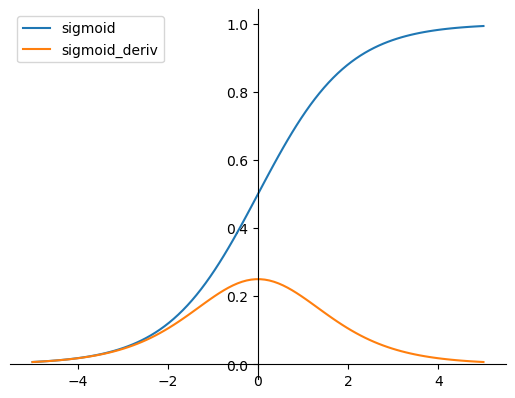

In [17]:
import matplotlib.pyplot as plt
import numpy as np

x_tensor = torch.tensor(np.linspace(-5, 5, 100))
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position(('data', 0))
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

plt.plot(x_tensor, sigmoid(x_tensor), label='sigmoid')
plt.plot(x_tensor, sigmoid_deriv(x_tensor), label='sigmoid_deriv')
ax.legend()
plt.show()

Зададим тензор, для которого мы хотели бы найти градиент (параметр `requires_grad=True`):

In [18]:
u = torch.tensor(0.0, requires_grad=True)
u

tensor(0., requires_grad=True)

Зададим тензор, которому присвоим значение функции 

In [19]:
s = sigmoid(u)
s

tensor(0.5000, grad_fn=<MulBackward0>)

В атрибуте `grad_fn` хранится ссылка на функцию, которая была использована для вычисления тензора.  
В случае задания тензора пользователем – `grad_fn = None`:

In [20]:
print(f'u.grad_fn: {u.grad_fn}\n')
print(f's.grad_fn: {s.grad_fn}\n')
a = u + u
print(f'(u+u).grad_fn: {a.grad_fn}\n')
a = u - u
print(f'(u-u).grad_fn: {a.grad_fn}\n')
a = u * u
print(f'(u*u).grad_fn: {a.grad_fn}\n')
a = u / u
print(f'(u/u).grad_fn: {a.grad_fn}\n')
a = 1 / u
print(f'(1/u).grad_fn: {a.grad_fn}\n')
a = torch.mean(u)
print(f'mean(u).grad_fn: {a.grad_fn}')

u.grad_fn: None

s.grad_fn: <MulBackward0 object at 0x000001927143AB60>

(u+u).grad_fn: <AddBackward0 object at 0x000001927143AB60>

(u-u).grad_fn: <SubBackward0 object at 0x000001927143AB60>

(u*u).grad_fn: <MulBackward0 object at 0x000001927143AB60>

(u/u).grad_fn: <DivBackward0 object at 0x000001927143AB60>

(1/u).grad_fn: <MulBackward0 object at 0x000001927143AB60>

mean(u).grad_fn: <MeanBackward0 object at 0x000001927143AB60>


---
Для вычисления градиента необходимо вызвать метод `backward`:

In [21]:
s.backward()

Значение градиента после вызова `backward` хранится в атрибуте `grad`:

In [22]:
u.grad

tensor(0.2500)

Проверим, что значение градиента (производной) совпадает со значением, вычисленным аналитически:

In [23]:
sigmoid_deriv(u)

tensor(0.2500, grad_fn=<MulBackward0>)

Обратите внимание, что повторный вызов метода `backward` невозможен:

In [24]:
# Раскомментируйте эту строку
# s.backward()

Для того, чтобы повторно вызывать метод `backward`, следует указать при его вызове параметр `retain_graph=True`. Но имейте в виду, что в этом случае значение градиента будет накапливаться:

In [25]:
a = torch.tensor(1.0, requires_grad=True)
b = a * a
b.backward(retain_graph=True)
print(f'a.grad = {a.grad}')
b.backward(retain_graph=True)
print(f'a.grad = {a.grad}')
b.backward()
print(f'a.grad = {a.grad}')

a.grad = 2.0
a.grad = 4.0
a.grad = 6.0


При необходимости градиенты можно обнулить:

In [26]:
u.grad.data.zero_()
u.grad

tensor(0.)

**Задание**. Проверьте значения производной сигмоидальной функции, вычисленные в разных точках. Сравните их со значениями на графике функций.

In [27]:
u = torch.tensor([-3.0, -2.0, -1.0, 0.0, 1.0, 2.0, 3.0], requires_grad=True)
s = sigmoid(u)
s.backward(torch.ones_like(u))
print(u.grad)
print(sigmoid_deriv(u))

tensor([0.0452, 0.1050, 0.1966, 0.2500, 0.1966, 0.1050, 0.0452])
tensor([0.0452, 0.1050, 0.1966, 0.2500, 0.1966, 0.1050, 0.0452],
       grad_fn=<MulBackward0>)


---
Отметим, что в PyTorch, конечно, имеется [своя реализация](https://pytorch.org/docs/stable/generated/torch.nn.Sigmoid.html) сигмоидальной функции.

**Задание**. Посчитайте значения градиента при помощи сигмоидальной функции из PyTorch.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


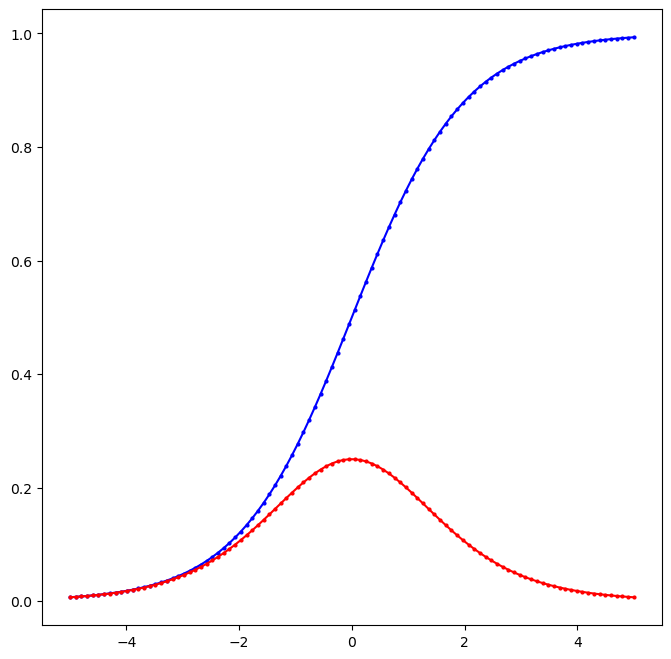

In [28]:
from torch.nn import Sigmoid

plt.figure(figsize=(8, 8))

x_tensor = torch.tensor(np.linspace(-5, 5, 100), dtype=torch.float32, requires_grad=True)

torch_sigmoid = Sigmoid()

sigmoid_x_tensor = torch_sigmoid(x_tensor)
sigmoid_x_tensor.backward(torch.ones_like(x_tensor))

ax = fig.add_subplot(1, 1, 1)

ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position(('data', 0))
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

plt.plot(x_tensor.detach().numpy(), sigmoid_x_tensor.detach().numpy(),color="blue", marker="o", markersize=2)
plt.plot(x_tensor.detach().numpy(), x_tensor.grad.detach().numpy(), color="red", marker="o", markersize=2)

ax.legend()
plt.show()

*Замечание*. Мы можем найти градиенты только для листьев в графе вычислений.

#### Приостановка отслеживания градиентов
По умолчанию, PyTorch отслеживает историю вычислений и поддерживает вычисление градиентов для тензоров, у которых установлено `requires_grad=True`.  
Однако иногда бывает необходимо приостановить отслеживание, например, когда сеть уже обучена и требуется выполнять только прямой проход или когда в процессе обучения сети нужно зафиксировать веса определенных слоев. В этом случае можно воспользоваться блоком `no_grad` или методом `detach()`:

In [29]:
s = sigmoid(u)
print(f's.requires_grad = {s.requires_grad}')

with torch.no_grad():
    s = sigmoid(u)
    
print(f's.requires_grad = {s.requires_grad}')

s.requires_grad = True
s.requires_grad = False


In [30]:
s = sigmoid(u)
print(f's.requires_grad = {s.requires_grad}')

s = s.detach()
print(f's.requires_grad = {s.requires_grad}')

s.requires_grad = True
s.requires_grad = False


### Линейная регрессия в PyTorch

#### Создание модели
Построим однослойную сеть, состоящую из одного нейрона, которая аналогична обычной линейной регрессии.

Пространство имен `nn` в PyTorch предоставляет все необходимые блоки для построения нейронных сетей.  
Каждый модуль наследует классу [nn.Module](https://pytorch.org/docs/stable/generated/torch.nn.Module.html). Нейронная сеть представляет собой также модуль, который содержит другие модули (слои).

In [31]:
from torch import nn

Определим устройство, на котором будем обучать сеть:

In [32]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print('Using "{}" device'.format(device))

Using "cuda" device


Опишем класс нашей нейронной сети (который должен являться наследником `nn.Module`):

In [33]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.regr = nn.Linear(1, 1)

    def forward(self, x):
        y = self.regr(x)
        return y

Метод `__init__` является конструктором класса.  
В первой строке конструктора вызывается конструктор базового класса `nn.Module`.  
Во второй строке создается единственный слой, содержащий один нейрон, с помощью модуля [Linear](https://pytorch.org/docs/stable/generated/torch.nn.Linear.html).  
Данный модуль осуществляет линейное преобразование входа $\vec{x}$ в выход $\vec{y}$ с учетом матрицы весов $W$:  

$$\vec{y}=\vec{x}W^T+\vec{b}.$$

Первый аргумент для `Linear` – `in_features` – количество входов $x$, второй `out_features` – количество выходов $y$ (фактически, количество нейронов в данном слое). Существует также третий аргумент – `bias`, определяющий наличие вектора свободных коэффициентов $\vec{b}$ (по умолчанию `bias=True`).  
Матрица весов $W$ будет иметь размерность (`out_features`, `in_features`), вектор свободных коэффициентов $\vec{b}$ – (`out_features`).  
Значения $W$ и $\vec{b}$ инициализируются случайным образом из равномерного распределения $U(-\sqrt{k},\sqrt{k})$, где $k=\frac{1}{in\_features}$.

Заметим, что атрибут `requires_grad` для тензоров-весов сети автоматически устанавливается в `True`.

Метод `forward` определяет поток данных через нашу сеть (*прямой проход*). Аргумент `x` – это входные данные для сети. В нашем примере к `x` применяется линейное преобразование, результат которого является выходом сети (линейная регрессия).

---
Инициализируем генератор случайных чисел PyTorch для воспроизводимости результатов (для одинаковых начальных значений весов):

In [34]:
torch.manual_seed(42)

Создаем экземпляр класса `NeuralNetwork` и выводим структуру сети:

In [35]:
model = NeuralNetwork()
model

NeuralNetwork(
  (regr): Linear(in_features=1, out_features=1, bias=True)
)

---
Перемещаем сеть на GPU:

In [36]:
model.to(device)

NeuralNetwork(
  (regr): Linear(in_features=1, out_features=1, bias=True)
)

---
Вывод значений весов:

In [37]:
def print_weights(model):
    for parameter in model.named_parameters():
        print(f'{parameter[0]} = {parameter[1].data}')

In [38]:
print_weights(model)

regr.weight = tensor([[0.7645]], device='cuda:0')
regr.bias = tensor([0.8300], device='cuda:0')


#### Генерация набора данных

Инициализируем генератор случайных чисел `numpy` для воспроизводимости результатов:

In [39]:
np.random.seed(42)

Генерируем случайные данные:  
- $X$ – из равномерного распределения от 1 до 10,
- $y=2x+1$ с учетом нормально распределенного шума.

In [40]:
n_samples = 100
data = np.random.uniform(1, 10, (n_samples, 1)).astype(np.float32)
targets = 2 * data + 1 + np.random.normal(0, 2, (n_samples, 1)).astype(np.float32)

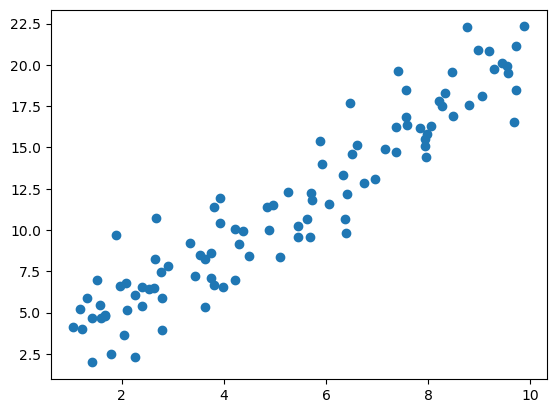

In [41]:
plt.scatter(data, targets)
plt.show()

Создаем тензоры PyTorch:

In [42]:
data = torch.from_numpy(data)
targets = torch.from_numpy(targets)

Перемещаем тензоры на GPU:

In [43]:
data = data.to(device)
targets = targets.to(device)

Нарисуем предсказание модели со случайно инициализированными весами:

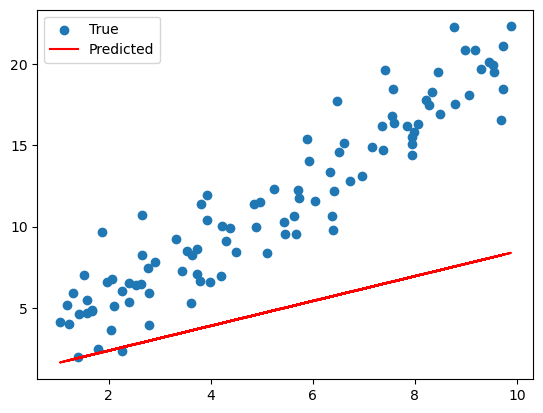

In [44]:
predictions = model(data)
plt.scatter(data.cpu().numpy(), targets.cpu().numpy())
plt.plot(data.cpu().detach().numpy(), predictions.cpu().detach().numpy(), color="red")
plt.legend(['True', 'Predicted'])
plt.show()

#### Обучение сети
Сначала задаем функцию потерь ([MSE](https://pytorch.org/docs/stable/generated/torch.nn.MSELoss.html)):

In [45]:
loss_fn = nn.MSELoss()

Затем определим оптимизатор:

In [46]:
learning_rate = 0.01
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
optimizer

SGD (
Parameter Group 0
    dampening: 0
    differentiable: False
    foreach: None
    fused: None
    lr: 0.01
    maximize: False
    momentum: 0
    nesterov: False
    weight_decay: 0
)

In [47]:
data

tensor([[4.3709],
        [9.5564],
        [7.5879],
        [6.3879],
        [2.4042],
        [2.4040],
        [1.5228],
        [8.7956],
        [6.4100],
        [7.3727],
        [1.1853],
        [9.7292],
        [8.4920],
        [2.9111],
        [2.6364],
        [2.6506],
        [3.7382],
        [5.7228],
        [4.8875],
        [3.6211],
        [6.5067],
        [2.2554],
        [3.6293],
        [4.2973],
        [5.1046],
        [8.0666],
        [2.7971],
        [5.6281],
        [6.3317],
        [1.4181],
        [6.4679],
        [2.5347],
        [1.5855],
        [9.5400],
        [9.6907],
        [8.2756],
        [3.7415],
        [1.8790],
        [7.1581],
        [4.9614],
        [2.0983],
        [5.4566],
        [1.3095],
        [9.1839],
        [3.3290],
        [6.9627],
        [3.8054],
        [5.6806],
        [5.9204],
        [2.6637],
        [9.7263],
        [7.9762],
        [9.4555],
        [9.0534],
        [6.3811],
        [9

Зададим функцию, определяющую действия в процессе одной эпохи обучения:

In [48]:
def train_loop(data, targets, model, loss_fn, optimizer, print_loss=True):
    # Устанавливаем для модели режим обучения: эквивалентно model.training = True
    # Действует только на модули Dropout, BatchNorm, InstanceNorm (https://stackoverflow.com/questions/66534762/which-pytorch-modules-are-affected-by-model-eval-and-model-train)
    model.train()
    
    for i in range(len(data)):
        # Вычисляем предсказание модели на одном объекте
        pred = model(data[i])
        
        # Вычисляем функцию потерь
        loss = loss_fn(pred, targets[i])

        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if print_loss:
            if i % 10 == 0:
                print(f'loss: {loss}')

Запускаем цикл обучения:

In [49]:
epochs = 10
print_weights(model)
for t in range(epochs):
    print(f'-------------------------------\nEpoch {t+1}')
    train_loop(data, targets, model, loss_fn, optimizer)
    print()
    print_weights(model)

regr.weight = tensor([[0.7645]], device='cuda:0')
regr.bias = tensor([0.8300], device='cuda:0')
-------------------------------
Epoch 1
loss: 32.994876861572266
loss: 3.7130351066589355
loss: 7.4773125648498535
loss: 16.94472312927246
loss: 0.06362053751945496
loss: 20.94452667236328
loss: 11.095436096191406
loss: 22.48904800415039
loss: 25.47216033935547
loss: 0.9354173541069031

regr.weight = tensor([[2.0708]], device='cuda:0')
regr.bias = tensor([1.1238], device='cuda:0')
-------------------------------
Epoch 2
loss: 0.06721831113100052
loss: 3.390458583831787
loss: 7.715185165405273
loss: 17.09217071533203
loss: 0.09646038711071014
loss: 20.185867309570312
loss: 11.15341567993164
loss: 22.767791748046875
loss: 26.13392448425293
loss: 0.8385037779808044

regr.weight = tensor([[2.0542]], device='cuda:0')
regr.bias = tensor([1.1944], device='cuda:0')
-------------------------------
Epoch 3
loss: 0.06614411622285843
loss: 3.180938482284546
loss: 7.878329277038574
loss: 17.1922893524169

---
Нарисуем получившуюся модель:

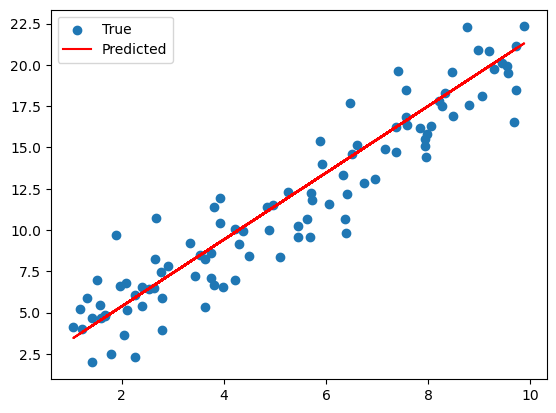

In [50]:
# Возвращаем модель в режим инференса: эквивалентно model.training = False
model.eval()

predictions = model(data)
plt.scatter(data.cpu().numpy(), targets.cpu().numpy())
plt.plot(data.cpu().detach().numpy(), predictions.cpu().detach().numpy(), color="red")
plt.legend(['True', 'Predicted'])

**Задание**. Вычислите MSE для итоговой модели.

In [51]:
loss_fn(predictions, targets)

tensor(3.5340, device='cuda:0', grad_fn=<MseLossBackward0>)

**Задание**. Выполните перебор гиперпараметров – скорости обучения и количества эпох (не менее пяти значений на каждый гиперпараметр) и найдите комбинацию, при которой достигается минимум MSE на обучающих данных.

In [52]:
for lr in [0.1, 0.01, 0.001, 0.0001, 0.00001]:
    for epochs in [10, 20, 30, 40, 50]:
        model = NeuralNetwork()
        model.to(device)
        optimizer = torch.optim.SGD(model.parameters(), lr=lr)
        
        for t in range(epochs):
            train_loop(data, targets, model, loss_fn, optimizer, print_loss=False)
        
        predictions = model(data)
        loss = loss_fn(predictions, targets)
        print(f'lr = {lr}, epochs = {epochs}, loss = {loss}')

lr = 0.1, epochs = 10, loss = nan
lr = 0.1, epochs = 20, loss = nan
lr = 0.1, epochs = 30, loss = nan
lr = 0.1, epochs = 40, loss = nan
lr = 0.1, epochs = 50, loss = nan
lr = 0.01, epochs = 10, loss = 3.5423688888549805
lr = 0.01, epochs = 20, loss = 3.5302653312683105
lr = 0.01, epochs = 30, loss = 3.52996826171875
lr = 0.01, epochs = 40, loss = 3.5299623012542725
lr = 0.01, epochs = 50, loss = 3.529963493347168
lr = 0.001, epochs = 10, loss = 3.3348052501678467
lr = 0.001, epochs = 20, loss = 3.41349720954895
lr = 0.001, epochs = 30, loss = 3.368387460708618
lr = 0.001, epochs = 40, loss = 3.349292516708374
lr = 0.001, epochs = 50, loss = 3.3255279064178467
lr = 0.0001, epochs = 10, loss = 3.4881322383880615
lr = 0.0001, epochs = 20, loss = 3.28560209274292
lr = 0.0001, epochs = 30, loss = 3.2626872062683105
lr = 0.0001, epochs = 40, loss = 3.5835142135620117
lr = 0.0001, epochs = 50, loss = 3.547982692718506
lr = 1e-05, epochs = 10, loss = 24.06145477294922
lr = 1e-05, epochs = 20, 

In [53]:
#lr = 0.0001, epochs = 30, loss = 3.2626872062683105

### Линейная классификация в PyTorch

#### Генерация набора данных
Сгенерируем набор данных для классификации: объекты с меткой "0" будут нормально распределены вокруг точки (-1, -1),  объекты с меткой "1" – вокруг точки (1, 1):

In [54]:
n_samples = 100
half = int(n_samples / 2)
     
x_class0 = np.random.normal(size=[half, 2]) + [-1, -1]
y_class0 = np.zeros((half, 1))

x_class1 = np.random.normal(size=[half, 2]) + [1, 1]
y_class1 = np.ones((half, 1))

data = np.vstack([x_class0, x_class1])
targets = np.vstack([y_class0, y_class1])

In [55]:
data = data.astype(np.float32)
targets = targets.astype(np.float32)

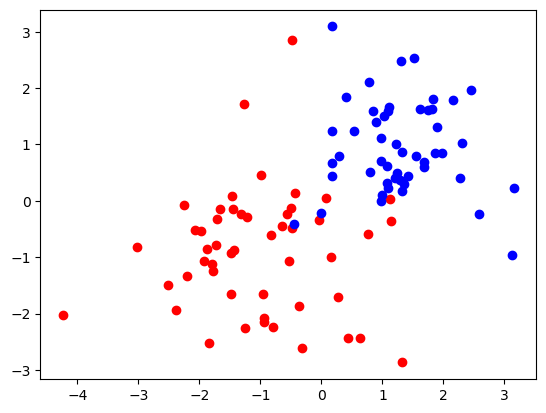

In [56]:
plt.scatter(x_class0[:, 0], x_class0[:, 1], c='red')
plt.scatter(x_class1[:, 0], x_class1[:, 1], c='blue')

#### Задание.
Постройте нейронную сеть – линейный классификатор и обучите её распознавать приведенный набор данных.  
*Подсказка*: в качестве функции потерь можно использовать Binary Cross Entropy ([BCELOSS](https://pytorch.org/docs/stable/generated/torch.nn.BCELoss.html)).

In [57]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.regr = nn.Linear(2, 1)

    def forward(self, x):
        y = self.regr(x)
        return torch.sigmoid(y)

In [58]:
data = torch.from_numpy(data)
targets = torch.from_numpy(targets)

In [59]:
model = NeuralNetwork()
for parameter in model.named_parameters():
    print(f'{parameter[0]} = {parameter[1].data}')

regr.weight = tensor([[-0.5424,  0.5802]])
regr.bias = tensor([0.2037])


In [60]:
loss_fn = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

epochs = 10
print_weights(model)
for t in range(epochs):
    print(f'-------------------------------\nEpoch {t+1}')
    
    model.train()
    acc = 0
    
    for i in range(len(data)):
        # Вычисляем предсказание модели на одном объекте
        pred = model(data[i])
        # Вычисляем функцию потерь
        loss = loss_fn(pred, targets[i])

        if round(pred.item()) == targets[i].item():
            acc += 1
            
        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    
    acc = acc / len(data)
    print(acc)
    print_weights(model)

regr.weight = tensor([[-0.5424,  0.5802]])
regr.bias = tensor([0.2037])
-------------------------------
Epoch 1
0.68
regr.weight = tensor([[-0.0103,  0.8326]])
regr.bias = tensor([0.1435])
-------------------------------
Epoch 2
0.9
regr.weight = tensor([[0.3010, 0.9578]])
regr.bias = tensor([0.1041])
-------------------------------
Epoch 3
0.91
regr.weight = tensor([[0.5139, 1.0352]])
regr.bias = tensor([0.0710])
-------------------------------
Epoch 4
0.92
regr.weight = tensor([[0.6743, 1.0896]])
regr.bias = tensor([0.0406])
-------------------------------
Epoch 5
0.93
regr.weight = tensor([[0.8024, 1.1304]])
regr.bias = tensor([0.0117])
-------------------------------
Epoch 6
0.93
regr.weight = tensor([[0.9090, 1.1626]])
regr.bias = tensor([-0.0160])
-------------------------------
Epoch 7
0.93
regr.weight = tensor([[1.0000, 1.1887]])
regr.bias = tensor([-0.0425])
-------------------------------
Epoch 8
0.93
regr.weight = tensor([[1.0793, 1.2105]])
regr.bias = tensor([-0.0680])
----

In [61]:
class0 = []
class1 = []

for x in data:
    if model(x) > 0.5:
        class1.append(x.numpy())
    else:
        class0.append(x.numpy())
        
class0 = np.array(class0)
class1 = np.array(class1)

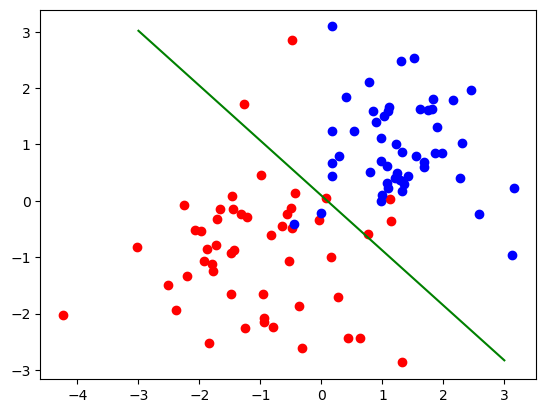

In [62]:
w1 = model.regr.weight[0][0].item()
w2 = model.regr.weight[0][1].item()
b = model.regr.bias[0].item()

x = np.linspace(-3, 3, 100)

plt.scatter(x_class0[:, 0], x_class0[:, 1], c='red')
plt.scatter(x_class1[:, 0], x_class1[:, 1], c='blue')
plt.plot(x, -(w1 * x + b) / w2, color='green')

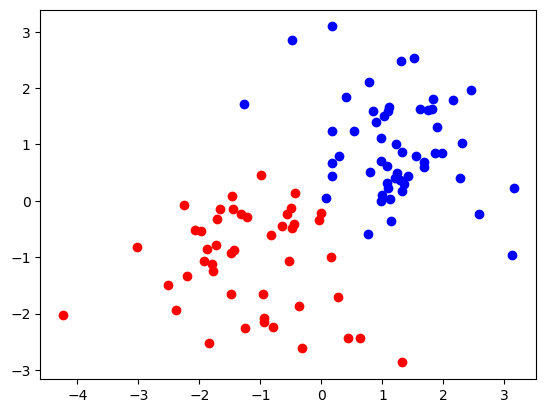

In [63]:
plt.scatter(class0[:, 0], class0[:, 1], c='red')
plt.scatter(class1[:, 0], class1[:, 1], c='blue')

#### Задание (факультативное).
Прочитать параграф 2.6 в учебнике С. Николенко и др. (стр. 81–92) и воспроизвести рассмотренные там нейронные сети на TensorFlow и Keras.